In [1]:
import mysql.connector as my

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mydb = my.connect(host="localhost",user="tykunal",password="tykunal",database="ecommerce")


cursor = mydb.cursor()


cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


Text(0.5, 1.0, 'City wise customer')

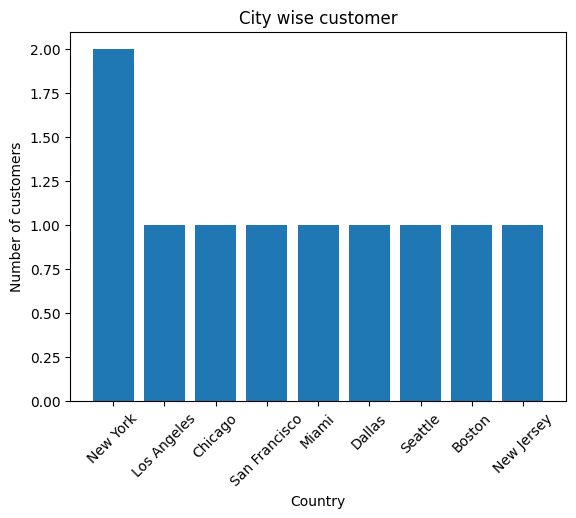

In [5]:
# customer_data
citywise=customer_data['city'].value_counts().reset_index()
plt.bar(citywise['city'],citywise['count'])
plt.xlabel("Country")
plt.ylabel("Number of customers")
plt.xticks(rotation=45)
plt.title("City wise customer")


Text(0.5, 1.0, 'Most frequent customer')

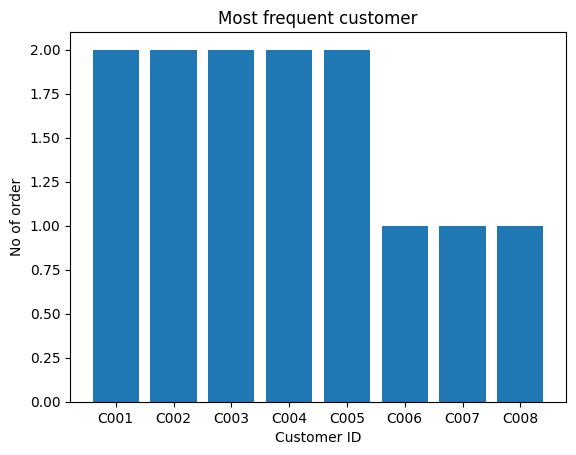

In [34]:
customer_order_frequency=order_data['customer_id'].value_counts().reset_index()
# customer_order_frequency
customer_order_frequency.columns = ['Customer_ID', 'Order_Count']

most_frequent_customers = customer_order_frequency.sort_values(by='Order_Count', ascending=False)

plt.bar(most_frequent_customers['Customer_ID'],most_frequent_customers['Order_Count'])
plt.xlabel("Customer ID")
plt.ylabel("No of order")
plt.title("Most frequent customer")

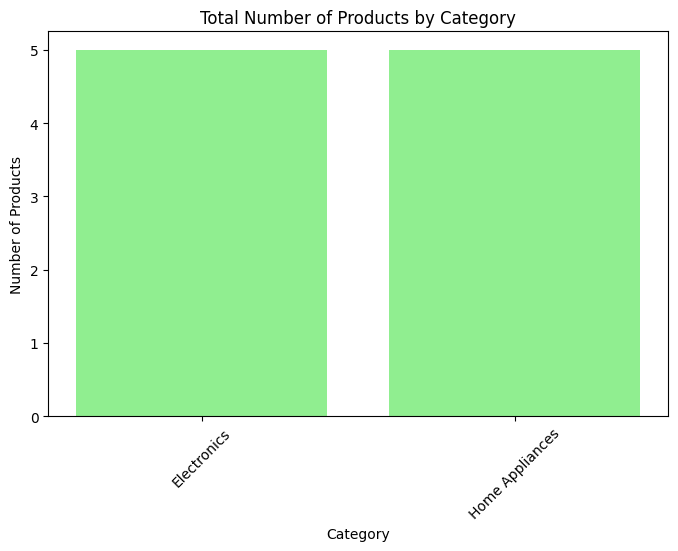

In [35]:
category_distribution = product_data.groupby('category')['product_id'].count().reset_index
category_distribution=product_data['category'].value_counts().reset_index()


category_distribution.columns = ['Category', 'Product_Count']
plt.figure(figsize=(8, 5))
plt.bar(category_distribution['Category'], category_distribution['Product_Count'], color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Total Number of Products by Category')
plt.xticks(rotation=45)
plt.show()


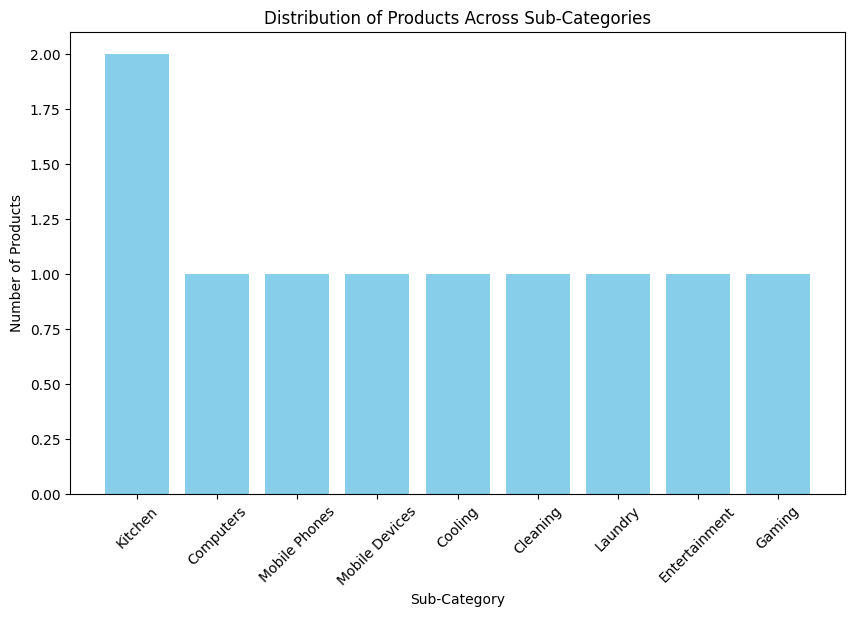

In [8]:

sub_category_distribution=product_data['sub_category'].value_counts().reset_index()
# print(sub_category_distribution)
sub_category_distribution.columns = ['Sub_Category', 'Product_Count']
plt.figure(figsize=(10, 6))
plt.bar(sub_category_distribution['Sub_Category'], sub_category_distribution['Product_Count'], color='skyblue')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Across Sub-Categories')
plt.xticks(rotation=45)
plt.show()

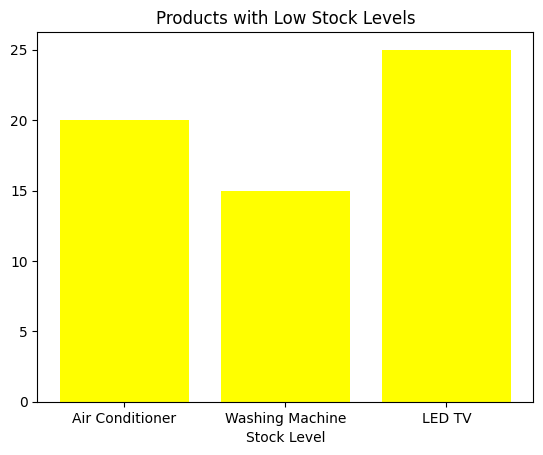

In [9]:
low_stock_product=product_data[product_data['stock'] < 30]
plt.bar(low_stock_product['product_name'],low_stock_product['stock'],color="Yellow")
plt.xlabel("Product Id")
plt.xlabel("Stock Level")
plt.title("Products with Low Stock Levels")
plt.show()

Text(0.5, 1.0, 'Average, Maximum, and Minimum Selling Prices')

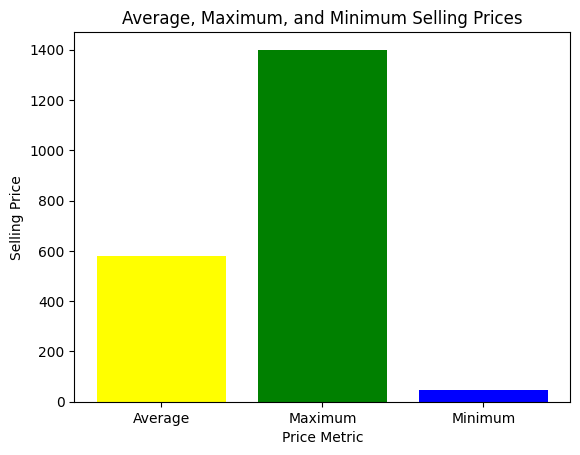

In [10]:
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()

price_data = {
    'Metric': ['Average', 'Maximum', 'Minimum'],
    'Price': [average_selling_price, maximum_selling_price, minimum_selling_price]
}

price_df = pd.DataFrame(price_data)


plt.bar(price_df['Metric'], price_df['Price'], color=['Yellow', 'green', 'blue'])
plt.xlabel('Price Metric')
plt.ylabel('Selling Price')
plt.title('Average, Maximum, and Minimum Selling Prices')

Text(0.5, 1.0, 'Total number of orders product id wise')

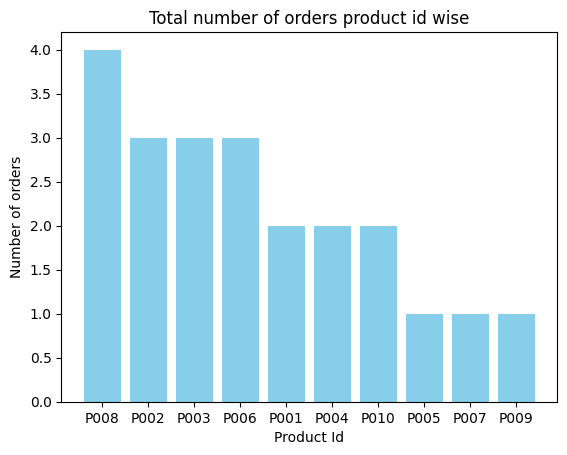

In [36]:
top10=order_data.groupby('product_id')['quantity'].sum().nlargest(10).reset_index()

plt.bar(top10['product_id'],top10['quantity'], color=['skyblue'])
plt.xlabel('Product Id')
plt.ylabel('Number of orders')
plt.title('Total number of orders product id wise')

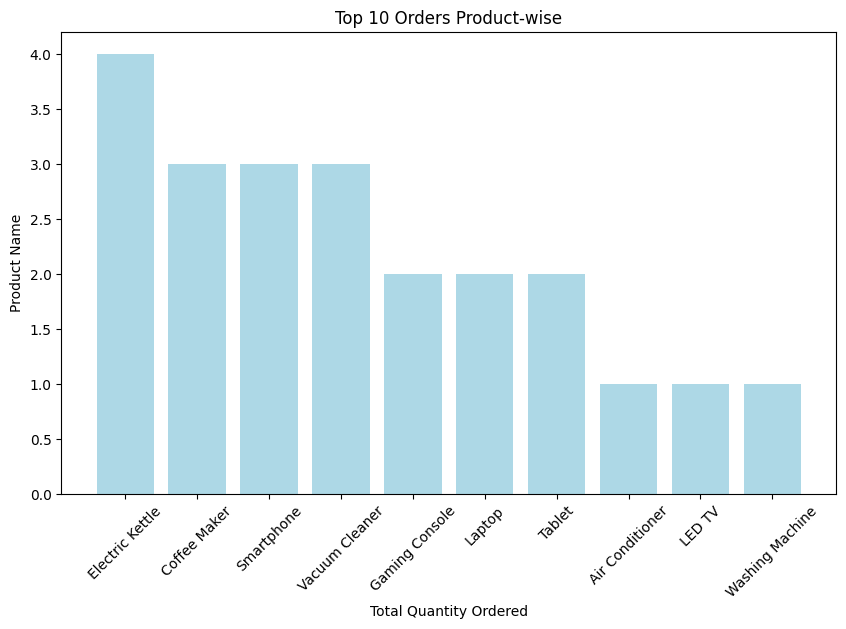

In [38]:
merged_data = pd.merge(order_data, product_data, on='product_id')
top_orders = merged_data.groupby('product_name')['quantity'].sum().reset_index()
top_10_orders = top_orders.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_orders['product_name'], top_10_orders['quantity'], color='lightblue')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Order Status Distribution')

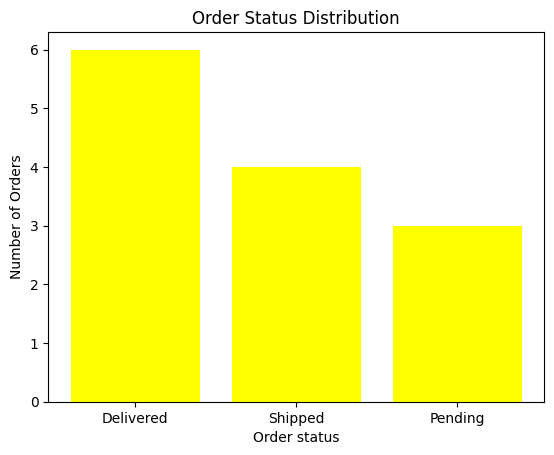

In [39]:
status=order_data['order_status'].value_counts().reset_index()
status.columns=['order_status','Status_count']
plt.bar(status['order_status'],status['Status_count'],color='yellow')
plt.xlabel('Order status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')

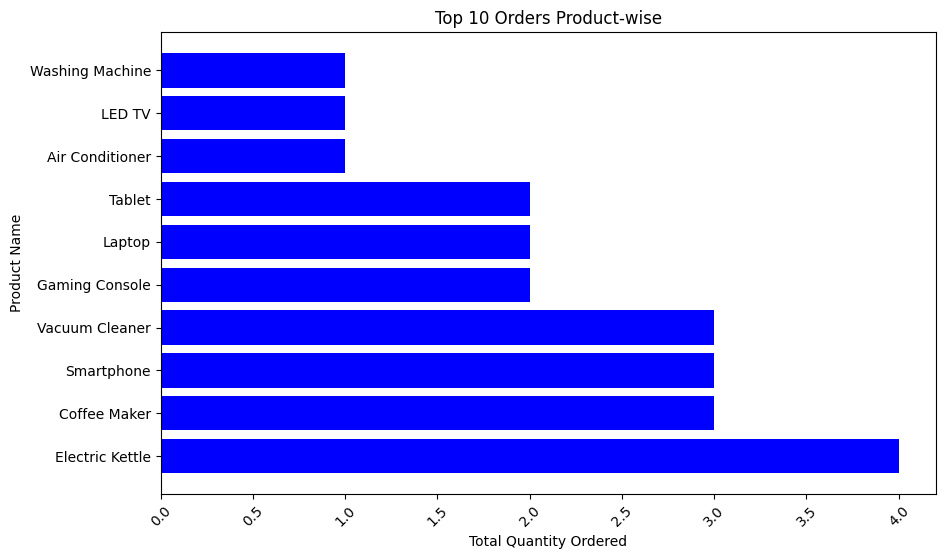

In [40]:
merged_data = pd.merge(order_data, product_data, on='product_id')
top_orders = merged_data.groupby('product_name')['quantity'].sum().reset_index()
top_10_orders = top_orders.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_orders['product_name'], top_10_orders['quantity'], color='blue')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
plt.show()

      product_name  total_price
0  Air Conditioner       1100.0
1     Coffee Maker        225.0
2  Electric Kettle        180.0
3   Gaming Console        700.0
4           LED TV       1400.0
5           Laptop       1900.0
6       Smartphone       1950.0
7           Tablet        560.0
8   Vacuum Cleaner        540.0
9  Washing Machine        750.0


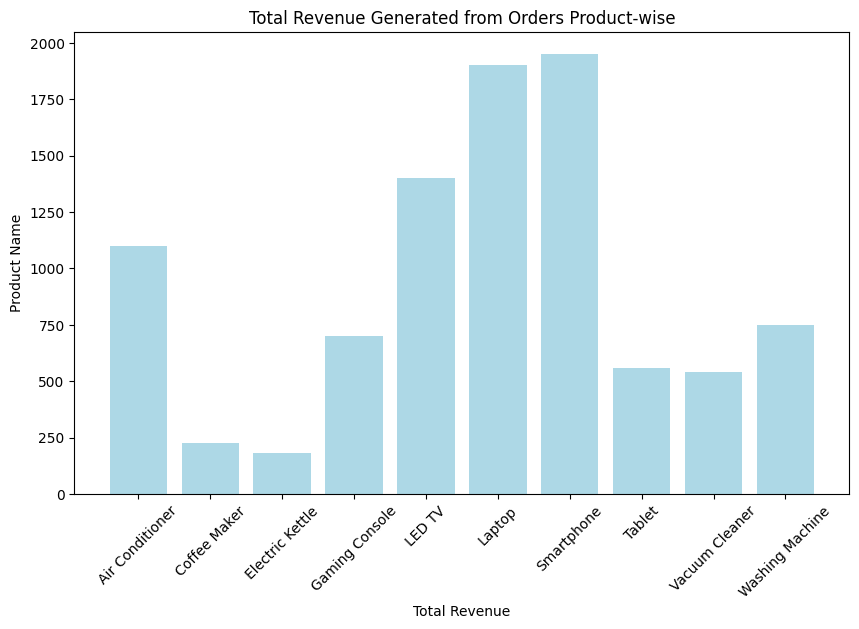

In [41]:
revenue_data = merged_data.groupby('product_name')['total_price'].sum().reset_index()

# print(revenue_data)
plt.figure(figsize=(10, 6))
plt.bar(revenue_data['product_name'], revenue_data['total_price'], color='lightblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.title('Total Revenue Generated from Orders Product-wise')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Total Revenue Precentage for Each Category')

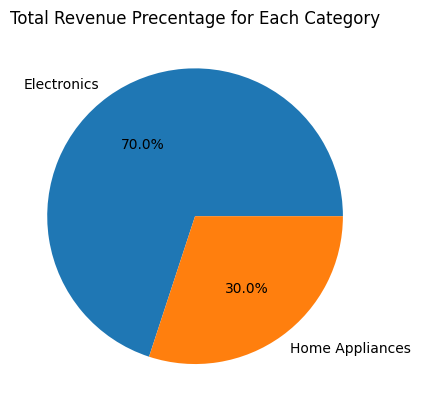

In [44]:
category_revenue_by_category = merged_data.groupby('category')['total_price'].sum().reset_index()

total_revenue = category_revenue_by_category['total_price'].sum()
plt.pie(category_revenue_by_category['total_price'],labels=category_revenue_by_category['category'],autopct='%1.1f%%')
plt.title("Total Revenue Precentage for Each Category")

In [17]:
total_revenue=order_data['total_price'].sum()
total_revenue

9305.0

Text(0.5, 1.0, 'Total Revenue')

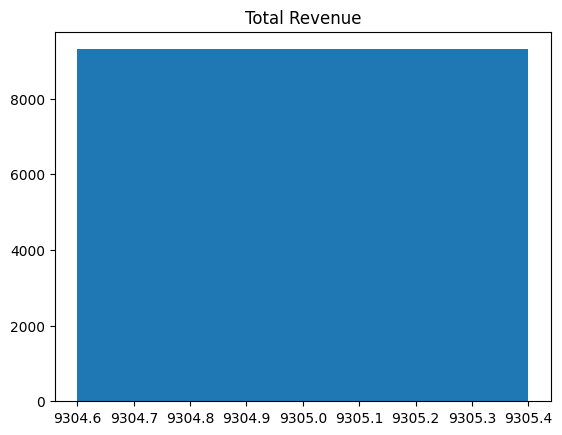

In [18]:
plt.bar(total_revenue,total_revenue)

plt.title('Total Revenue')

In [19]:
merged_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price,stock
0,27,C001,P001,1.0,950.0,Credit Card,2024-08-01 10:00:00,Shipped,Laptop,Electronics,Computers,1000.0,950.0,50
1,28,C002,P002,2.0,1300.0,PayPal,2024-08-02 15:30:00,Delivered,Smartphone,Electronics,Mobile Phones,700.0,650.0,100
2,29,C003,P003,1.0,75.0,Credit Card,2024-08-03 12:45:00,Pending,Coffee Maker,Home Appliances,Kitchen,80.0,75.0,30
3,30,C004,P004,2.0,560.0,Debit Card,2024-08-05 11:00:00,Delivered,Tablet,Electronics,Mobile Devices,300.0,280.0,150
4,31,C005,P005,1.0,1100.0,Credit Card,2024-08-06 14:30:00,Shipped,Air Conditioner,Home Appliances,Cooling,1200.0,1100.0,20
5,32,C006,P006,3.0,540.0,PayPal,2024-08-07 09:45:00,Pending,Vacuum Cleaner,Home Appliances,Cleaning,200.0,180.0,60
6,33,C007,P007,1.0,750.0,Credit Card,2024-08-08 16:20:00,Delivered,Washing Machine,Home Appliances,Laundry,800.0,750.0,15
7,34,C008,P008,4.0,180.0,Debit Card,2024-08-09 18:15:00,Delivered,Electric Kettle,Home Appliances,Kitchen,50.0,45.0,100
8,35,C001,P009,1.0,1400.0,Credit Card,2024-08-10 20:00:00,Shipped,LED TV,Electronics,Entertainment,1500.0,1400.0,25
9,36,C002,P010,2.0,700.0,PayPal,2024-08-11 21:30:00,Pending,Gaming Console,Electronics,Gaming,400.0,350.0,80


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Air Conditioner'),
  Text(1, 0, 'LED TV'),
  Text(2, 0, 'Laptop'),
  Text(3, 0, 'Smartphone'),
  Text(4, 0, 'Washing Machine'),
  Text(5, 0, 'Gaming Console'),
  Text(6, 0, 'Tablet'),
  Text(7, 0, 'Vacuum Cleaner'),
  Text(8, 0, 'Coffee Maker'),
  Text(9, 0, 'Electric Kettle')])

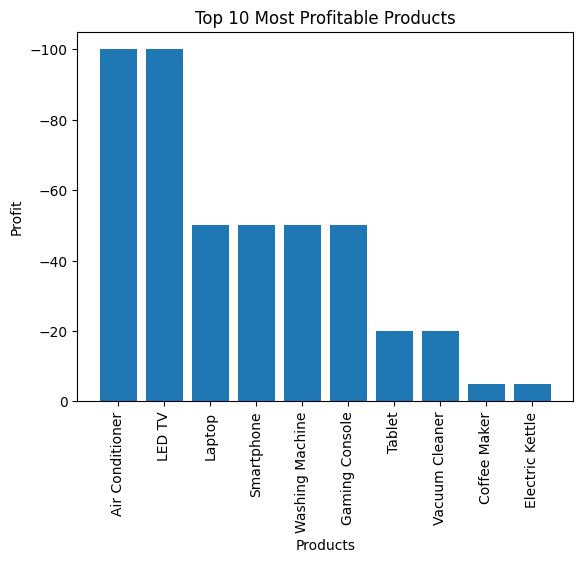

In [20]:
profitable_prices=product_data['selling_price']-product_data['original_price']
profitable_products = pd.DataFrame({
    'Product Name': product_data['product_name'],
    'Profit': profitable_prices
})
profitable_products.sort_values(by="Profit",inplace=True)
plt.bar(profitable_products['Product Name'],profitable_products['Profit'])
plt.xlabel('Products')
plt.ylabel('Profit')
plt.title('Top 10 Most Profitable Products')
plt.gca().invert_yaxis()
plt.xticks(rotation=90)

In [21]:
# Customer Order Patterns

Text(0.5, 1.0, 'Total quantity of highest and lowest orderd products')

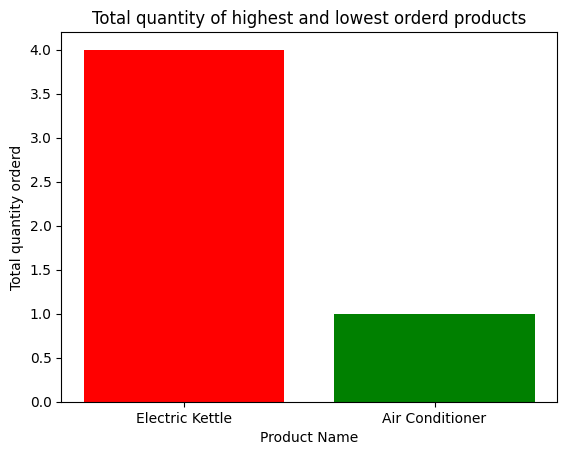

In [22]:
product_order_totals = merged_data.groupby('product_name')['quantity'].sum()

highest_order_product = product_order_totals.idxmax()
highest_order_quantity = product_order_totals.max()

lowest_order_product = product_order_totals.idxmin()
lowest_order_quantity = product_order_totals.min()

max_min_q={
    "Product":[highest_order_product,lowest_order_product],
    "Quntity":[highest_order_quantity,lowest_order_quantity]
}

plt.bar(max_min_q["Product"],max_min_q["Quntity"],color=["red","green"])
plt.xlabel('Product Name')
plt.ylabel('Total quantity orderd')
plt.title('Total quantity of highest and lowest orderd products')

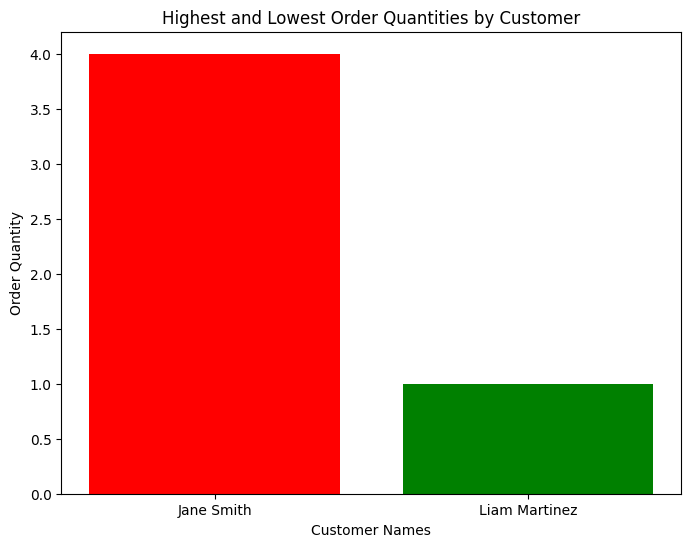

In [23]:

customer_order_totals = merged_data.groupby('customer_id')['quantity'].sum()

highest_order_customer = customer_order_totals.idxmax()
highest_order_quantity = customer_order_totals.max()

lowest_order_customer = customer_order_totals.idxmin()
lowest_order_quantity = customer_order_totals.min()

max_min_q = {
    "customer_id": [highest_order_customer, lowest_order_customer],
    "Quantity": [highest_order_quantity, lowest_order_quantity]
}

names = []
for customer_id in max_min_q["customer_id"]:
    name = customer_data[customer_data['customer_id'] == customer_id].iloc[0]['name']
    names.append(name)

plt.figure(figsize=(8, 6))
plt.bar(names, max_min_q["Quantity"], color=["red", "green"])
plt.xlabel('Customer Names')
plt.ylabel('Order Quantity')
plt.title('Highest and Lowest Order Quantities by Customer')
plt.show()


In [24]:
payment_methods= order_data['payment_mode'].value_counts().reset_index()
payment_methods

,payment_mode,count
0,Credit Card,8
1,PayPal,3
2,Debit Card,2


Text(0.5, 1.0, 'Payment Mode Preferences')

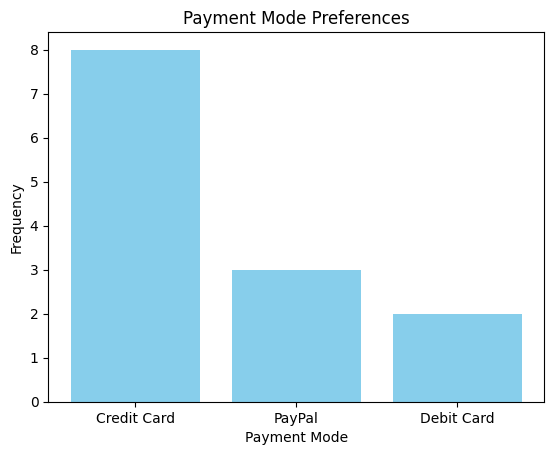

In [25]:
plt.bar(payment_methods['payment_mode'],payment_methods['count'],color="Skyblue")
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.title('Payment Mode Preferences')

In [26]:
# Time-based Analysis

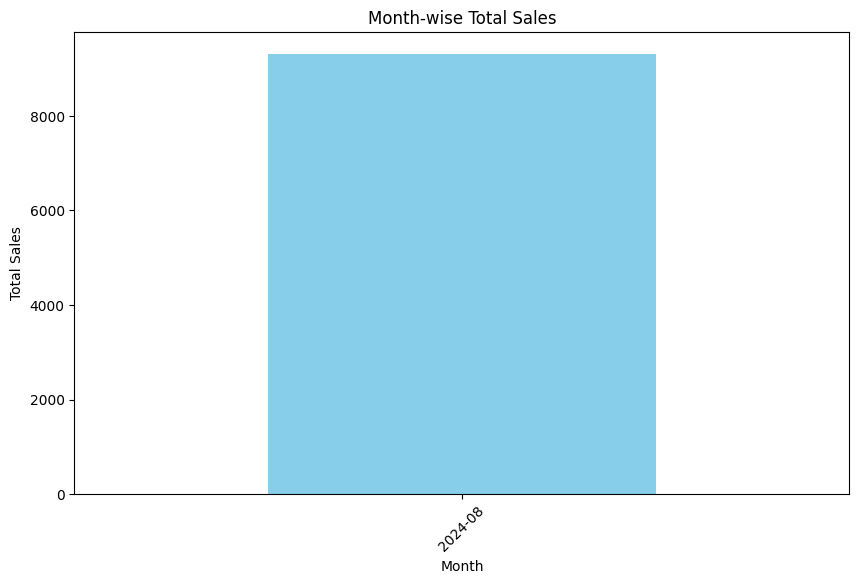

In [27]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

order_data['month'] = order_data['order_date'].dt.to_period('M')

month_wise_sales = order_data.groupby('month')['total_price'].sum()




plt.figure(figsize=(10, 6))
month_wise_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45)
plt.show()


year_month
2024-08    9305.0
Freq: M, Name: total_price, dtype: float64


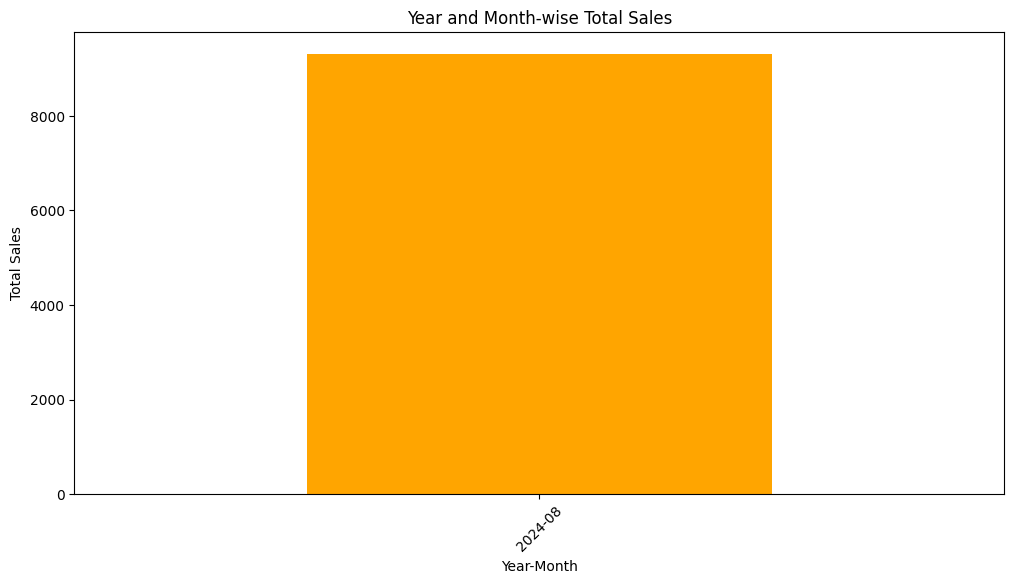

In [28]:
order_data['year_month'] = order_data['order_date'].dt.to_period('M')

year_month_wise_sales = order_data.groupby('year_month')['total_price'].sum()

print(year_month_wise_sales)


plt.figure(figsize=(12, 6))
year_month_wise_sales.plot(kind='bar', color='orange')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Year and Month-wise Total Sales')
plt.xticks(rotation=45)
plt.show()

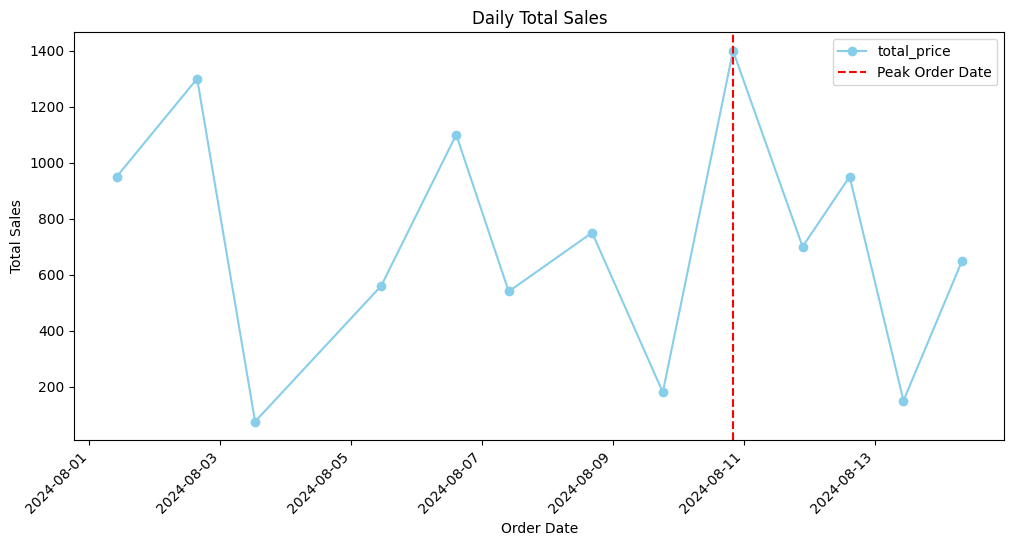

In [29]:
daily_sales = order_data.groupby('order_date')['total_price'].sum()

peak_order_date = daily_sales.idxmax()
peak_sales_amount = daily_sales.max()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='skyblue',marker='o')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Daily Total Sales')
plt.axvline(x=peak_order_date, color='red', linestyle='--', label='Peak Order Date')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Customer distribution across different cities')

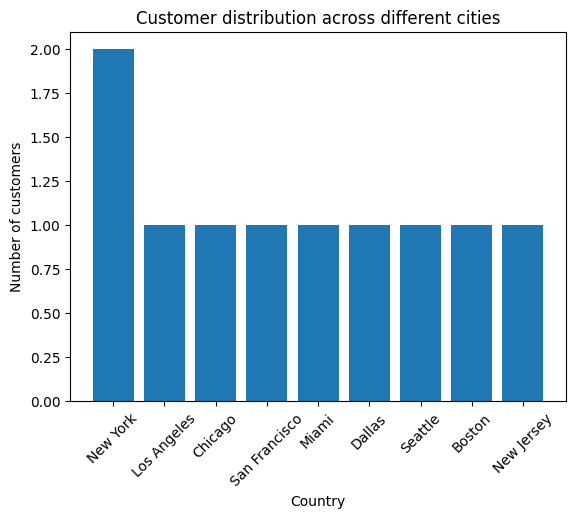

In [30]:
# ● Geographical Analysis
citywise=customer_data['city'].value_counts().reset_index()
plt.bar(citywise['city'],citywise['count'])
plt.xlabel("Country")
plt.ylabel("Number of customers")
plt.xticks(rotation=45)
plt.title("Customer distribution across different cities")


In [31]:
import seaborn as sns

order_details_with_info = order_data.merge(customer_data[['customer_id', 'city']], on='customer_id')
order_details_with_info = order_details_with_info.merge(product_data[['product_id', 'category']], on='product_id')

city_product_sales = order_details_with_info.groupby(['city', 'product_id', 'category'])['quantity'].sum().reset_index()

pivot_data = city_product_sales.pivot_table(index='product_id', columns='city', values='quantity', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', linewidths=.5)
plt.title('Product Sales by City Heatmap')
plt.xlabel('City')
plt.ylabel('Product ID')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

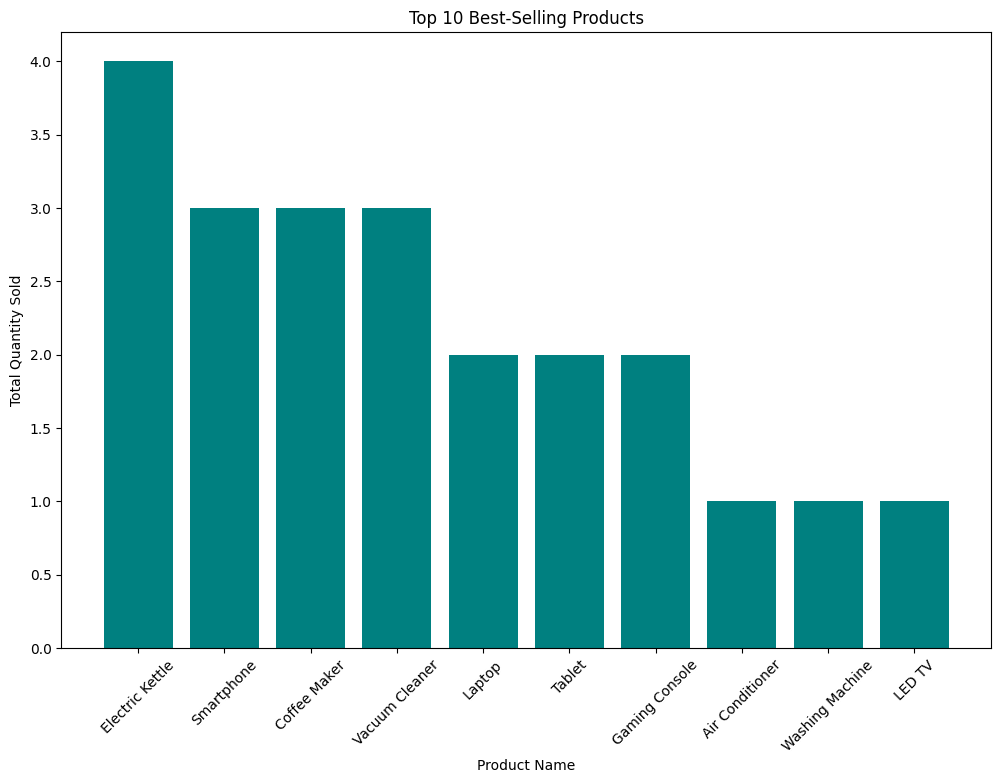

In [ ]:
product_sales = order_data.groupby('product_id')['quantity'].sum()

product_sales = product_sales.reset_index()
product_sales = product_sales.merge(product_data, on='product_id')
best_selling_products = product_sales.sort_values(by='quantity', ascending=False)


top_products = best_selling_products.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_products['product_name'], top_products['quantity'], color='teal')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()

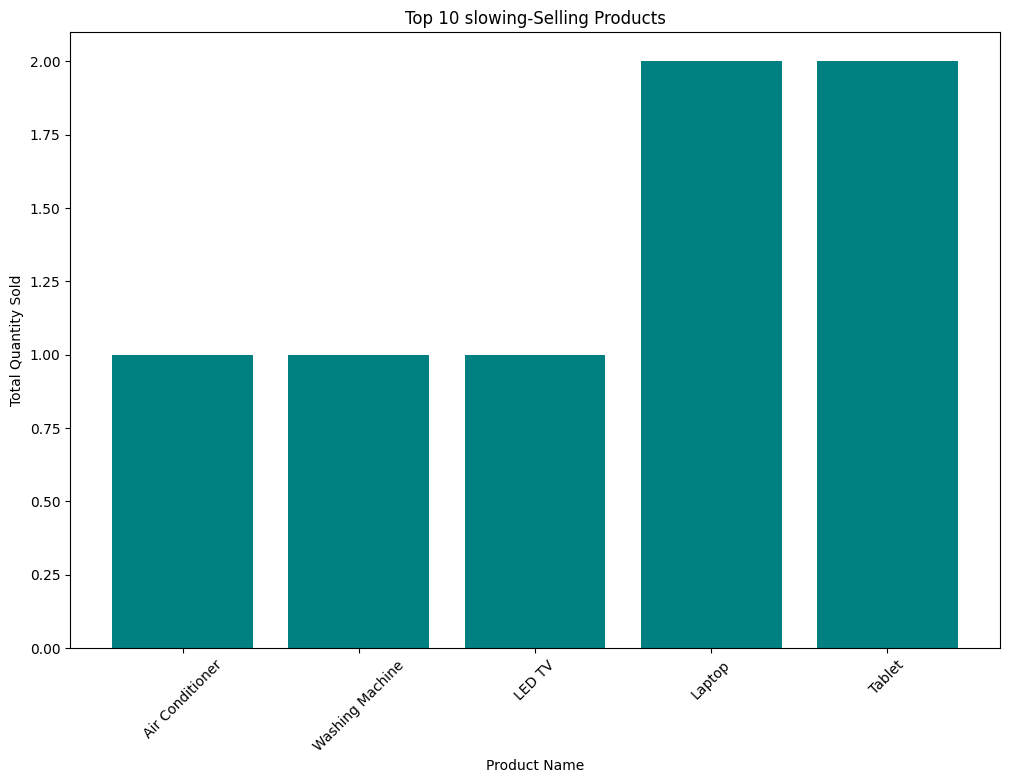

In [ ]:
slow_moving_products = product_sales.sort_values(by='quantity')


bottom_products = slow_moving_products.head(5)

plt.figure(figsize=(12, 8))
plt.bar(bottom_products['product_name'], bottom_products['quantity'], color='teal')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 slowing-Selling Products')
plt.xticks(rotation=45)
plt.show()

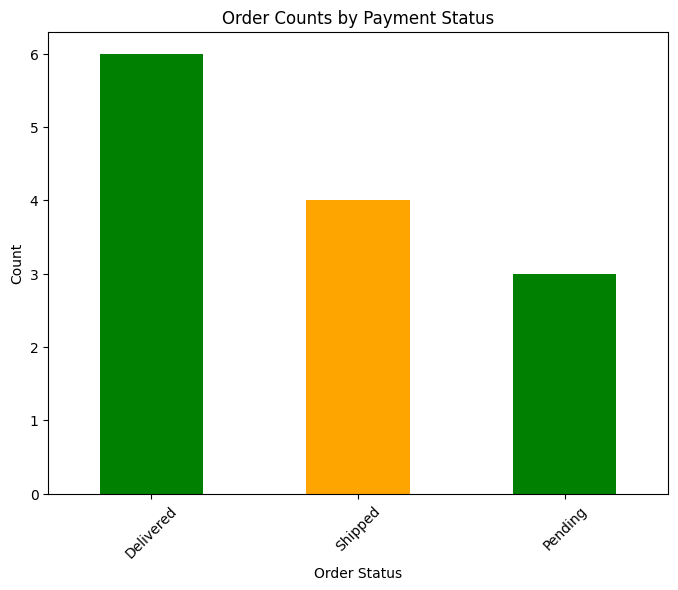

In [ ]:
payment_status_counts = order_data['order_status'].value_counts()


plt.figure(figsize=(8, 6))
payment_status_counts.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Counts by Payment Status')
plt.xticks(rotation=45)
plt.show()

Note: you may need to restart the kernel to use updated packages.
